# Samuel's Models
I'll be building an Arima model for the following basins:
 - Grand Ronde, Powder Burnt, Imnaha
 - Henry's Fork, Teton, Willow, Blackfoot, Portneuf
 - Idaho Panhandle Region
 - Kootenai River In Montana
 - Lewis Cowlitz
 - Lower Clark Fork River Basin
 - Lower Columbia Hood River
 - Owyhee Malheur
 
First, I'll try building one model I can apply to every dataset, but if that fails, I'll build 8 models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV, train_test_split
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [3]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [4]:
def data_formatter(filename):
    df = pd.read_csv(f'./basin_csvs/{filename}')
    df.set_index(pd.to_datetime(df['yyyymmdd']), inplace = True)
    df.drop(columns = ['Unnamed: 0', 'yyyymmdd'],inplace = True)
    return df


In [5]:
grand_ronde_df = data_formatter('grand_ronde_powder_burnt_imnaha.csv')
henrys_fork_df = data_formatter('henrys_fork_teton_willow_blackfoot_portneuf.csv')
idaho_panhandle_df = data_formatter('idaho_panhandle_region.csv')
kootenai_river_df = data_formatter('kootenai_river_in_montana.csv')
lewis_cowlitz_df = data_formatter('lewis_cowlitz.csv')
lower_clark_df = data_formatter('lower_clark_fork_river_basin.csv')
lower_columbia_df = data_formatter('lower_columbia_hood_river.csv')
owyhee_malheur_df = data_formatter('owyhee_malheur.csv')
basin_df_list = [grand_ronde_df, henrys_fork_df, idaho_panhandle_df, kootenai_river_df, 
                 lewis_cowlitz_df, lower_clark_df, lower_columbia_df, owyhee_malheur_df]


In [6]:
grand_ronde_df.shape

(351, 36)

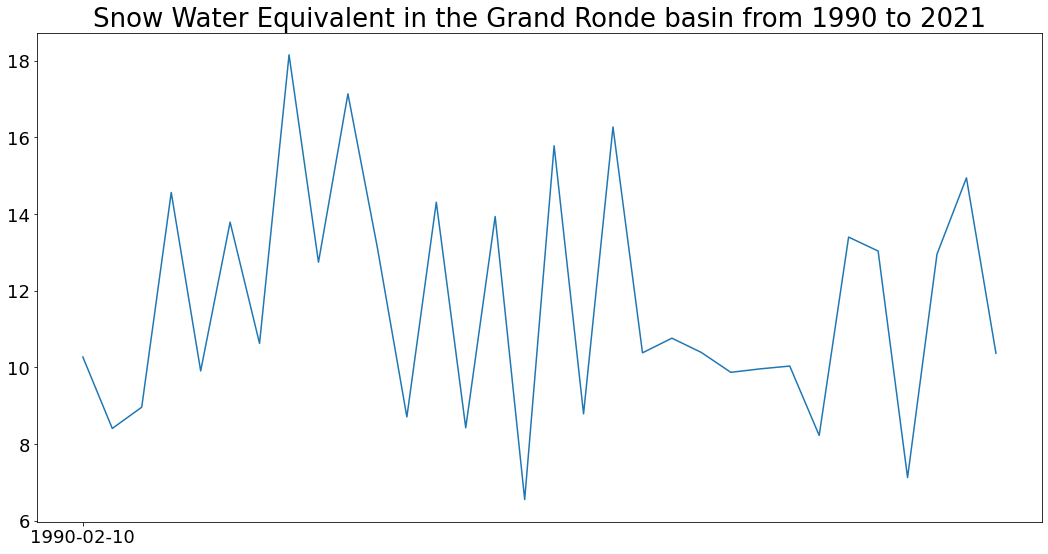

In [7]:
plot_series(grand_ronde_df.groupby('yyyymmdd').mean(), cols=['wteq_amt'], title='Snow Water Equivalent in the Grand Ronde basin from 1990 to 2021', steps=32)

In [8]:
len(grand_ronde_df.groupby('yyyymmdd').mean()['wteq_amt'].index)

32

In [9]:
def basin_grouper(basin_df):
    df = pd.DataFrame(basin_df.groupby('yyyymmdd').mean())  
    return df.asfreq(pd.DateOffset(years=1))

In [10]:
grand_group_df = basin_grouper(grand_ronde_df)
henry_group_df = basin_grouper(henrys_fork_df)
idaho_group_df = basin_grouper(idaho_panhandle_df)
kootenai_group_df = basin_grouper(kootenai_river_df)
lewis_group_df = basin_grouper(lewis_cowlitz_df)
clark_group_df = basin_grouper(lower_clark_df)
columbia_group_df = basin_grouper(lower_columbia_df)
owyhee_group_df = basin_grouper(owyhee_malheur_df)

In [11]:
interpret_dftest(adfuller(grand_group_df['wteq_amt']))
#fairly unstationary to begin with

Test Statistic   -7.315623e+00
p-value           1.231519e-10
dtype: float64

In [12]:
interpret_dftest(adfuller(henry_group_df['wteq_amt']))

Test Statistic   -1.875563
p-value           0.343643
dtype: float64

In [13]:
interpret_dftest(adfuller(idaho_group_df['wteq_amt']))

Test Statistic   -6.637471e+00
p-value           5.516138e-09
dtype: float64

In [14]:
interpret_dftest(adfuller(kootenai_group_df['wteq_amt']))

Test Statistic   -6.580917e+00
p-value           7.518268e-09
dtype: float64

In [15]:
interpret_dftest(adfuller(clark_group_df['wteq_amt']))

Test Statistic   -6.642518e+00
p-value           5.365469e-09
dtype: float64

In [16]:
interpret_dftest(adfuller(columbia_group_df['wteq_amt']))

Test Statistic   -6.554637e+00
p-value           8.677971e-09
dtype: float64

In [17]:
interpret_dftest(adfuller(owyhee_group_df['wteq_amt']))

Test Statistic   -7.034230e+00
p-value           6.074418e-10
dtype: float64

In [18]:
grand_group_df

,lat,long,station_id,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg,...,lower_columbia_hood_river,owyhee_malheur,raft_goose_salmon_falls_bruneau,snake_above_palisades,umatilla_walla_walla_willow,upper_clark_fork_river_basin,weiser_payette_boise,white_green_cedar_skykomish_snoqualmi_baker_skagit,willamette,yakima_ahtanum
yyyymmdd,,,,,,,,,,,,,,,,,,,,,
1990-02-10,45.063636,-117.845455,554.090909,5871.818182,10.272727,12.054545,84.454545,14.027273,17.490909,78.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-02-10,45.063636,-117.845455,554.090909,5871.818182,8.409091,12.054545,64.727273,13.254545,17.490909,75.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-10,45.063636,-117.845455,554.090909,5871.818182,8.963636,12.054545,71.545455,13.654545,17.490909,78.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-10,45.063636,-117.845455,554.090909,5871.818182,14.563636,12.054545,122.454545,17.563636,17.490909,100.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-02-10,45.063636,-117.845455,554.090909,5871.818182,9.909091,12.054545,80.909091,11.936364,17.490909,66.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-02-10,45.063636,-117.845455,554.090909,5871.818182,13.790909,12.054545,103.363636,19.509091,17.490909,110.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-02-10,45.063636,-117.845455,554.090909,5871.818182,10.627273,12.054545,83.181818,23.372727,17.490909,135.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-02-10,45.063636,-117.845455,554.090909,5871.818182,18.154545,12.054545,146.090909,27.090909,17.490909,154.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-02-10,45.063636,-117.845455,554.090909,5871.818182,12.745455,12.054545,110.545455,16.200000,17.490909,92.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
grand_group_df.drop(columns = 'wteq_amt')

,lat,long,station_id,elevation,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg,big_and_little_lost_basins,...,lower_columbia_hood_river,owyhee_malheur,raft_goose_salmon_falls_bruneau,snake_above_palisades,umatilla_walla_walla_willow,upper_clark_fork_river_basin,weiser_payette_boise,white_green_cedar_skykomish_snoqualmi_baker_skagit,willamette,yakima_ahtanum
yyyymmdd,,,,,,,,,,,,,,,,,,,,,
1990-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,84.454545,14.027273,17.490909,78.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,64.727273,13.254545,17.490909,75.636364,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,71.545455,13.654545,17.490909,78.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,122.454545,17.563636,17.490909,100.909091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,80.909091,11.936364,17.490909,66.818182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,103.363636,19.509091,17.490909,110.818182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,83.181818,23.372727,17.490909,135.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,146.090909,27.090909,17.490909,154.454545,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-02-10,45.063636,-117.845455,554.090909,5871.818182,12.054545,110.545455,16.200000,17.490909,92.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sns.pairplot(grand_group_df);

# Modeling Time

In [ ]:
#code taken from ARIMA lesson
X = grand_group_df.drop(columns = 'wteq_amt')
y = grand_group_df['wteq_amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting ARIMA({p}, 1, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog=y_train, order=(p, 1, q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')
model = ARIMA(endog = y_train, exog = X_train, order = (best_p, 1, best_q))
arima = model.fit()
preds = arima.predict(start=y_test.index[0], end = y_test.index[-1], exog = X_test )
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = f'Once-Differenced Snow Water Equivalent with ARIMA({best_p},1,{best_q}) Predictions', fontsize=16)
plt.show();